# Project 4: Global wildlife trade

Maaike de Jong
Ironhack Data Analytics Part-time 2020

In this project I use the CITES trade database to investigate the global wildlife trade. The database contains XX records, from XX species, XX years. 

In this notebook I analyse the CITES global trade in living, wild mammals from 2000-2018

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [243]:
df = pd.read_csv('../data/mammals_wild_live_00_19.csv')
df.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2000,I,Bos gaurus,Mammalia,Artiodactyla,Bovidae,Bos,EE,US,NaN,4.0,NaN,live,NaN,Z,NaN
1,2000,I,Pudu puda,Mammalia,Artiodactyla,Cervidae,Pudu,ZA,DE,NaN,2.0,NaN,live,NaN,Z,NaN
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W
4,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CR,MX,NaN,2.0,NaN,live,NaN,Q,U


In [244]:
# Inspect dataframe attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6346 entries, 0 to 6345
Data columns (total 16 columns):
Year                          6346 non-null int64
App.                          6346 non-null object
Taxon                         6346 non-null object
Class                         6346 non-null object
Order                         6346 non-null object
Family                        6343 non-null object
Genus                         6325 non-null object
Importer                      6239 non-null object
Exporter                      6274 non-null object
Origin                        1359 non-null object
Importer reported quantity    3193 non-null float64
Exporter reported quantity    4188 non-null float64
Term                          6346 non-null object
Unit                          5 non-null object
Purpose                       5956 non-null object
Source                        5900 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 793.3+ KB


In [245]:
df.isnull().sum()

Year                             0
App.                             0
Taxon                            0
Class                            0
Order                            0
Family                           3
Genus                           21
Importer                       107
Exporter                        72
Origin                        4987
Importer reported quantity    3153
Exporter reported quantity    2158
Term                             0
Unit                          6341
Purpose                        390
Source                         446
dtype: int64

In [246]:
# inspect column 'Year'

df['Year'].value_counts()

2000    508
2001    501
2002    392
2010    391
2003    388
2004    374
2005    352
2012    331
2009    328
2011    321
2013    310
2006    308
2008    307
2007    279
2016    265
2018    260
2014    259
2017    257
2015    210
2019      5
Name: Year, dtype: int64

In [247]:
# exclude 2019 because there are few records, data for this year is not complete

df1 = df[df['Year'] != 2019]

In [248]:
# inspect column 'App.', this is info on which Appendix the species are listed

df1['App.'].value_counts()

# haven't yet found out what 'N' means. Consider removing

II     4637
I       981
III     715
N         8
Name: App., dtype: int64

In [249]:
df1['Order'].value_counts()

Primates          2424
Carnivora         1971
Cetacea            530
Proboscidea        380
Artiodactyla       354
Perissodactyla     342
Rodentia            94
Chiroptera          70
Pilosa              62
Pholidota           59
Sirenia             28
Scandentia          14
Diprotodontia       11
Cingulata            2
Name: Order, dtype: int64

In [250]:
df1['Term'].value_counts()

live    6341
Name: Term, dtype: int64

In [251]:
df1['Purpose'].value_counts()

T    2265
Z    1337
Q     776
P     407
B     383
S     265
N     217
M     113
E     104
H      63
L      21
Name: Purpose, dtype: int64

In [252]:
df1['Source'].value_counts()

# 'W' means wild, 'U' means source unknown. So I'm removing the records with an unknown source

W    5458
U     437
Name: Source, dtype: int64

In [253]:
df2 = df1[df1['Source'] == 'W']

In [254]:
# add a column with English names of the Order

df2.loc[df['Order'] == 'Primates','Animal order'] = 'Primates'
df2.loc[df['Order'] == 'Carnivora','Animal order'] = 'Carnivores'
df2.loc[df['Order'] == 'Cetacea','Animal order'] = 'Whales and Dolphins'
df2.loc[df['Order'] == 'Proboscidea','Animal order'] = 'Elephants'
df2.loc[df['Order'] == 'Artiodactyla','Animal order'] = 'Even-toed Ungulates'
df2.loc[df['Order'] == 'Perissodactyla','Animal order'] = 'Odd-toed Ungulates'
df2.loc[df['Order'] == 'Chiroptera','Animal order'] = 'Bats'
df2.loc[df['Order'] == 'Pilosa','Animal order'] = 'Sloths and Anteaters'
df2.loc[df['Order'] == 'Pholidota','Animal order'] = 'Pangolins'
df2.loc[df['Order'] == 'Sirenia','Animal order'] = 'Sea-cows'
df2.loc[df['Order'] == 'Scandentia','Animal order'] = 'Treeshrews'
df2.loc[df['Order'] == 'Diprotodontia','Animal order'] = 'Marsupials'
df2.loc[df['Order'] == 'Cingulata','Animal order'] = 'Armadillos'

df2['Animal order'].value_counts()

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Primates                2109
Carnivores              1594
Whales and Dolphins      523
Odd-toed Ungulates       324
Even-toed Ungulates      304
Elephants                290
Bats                      69
Sloths and Anteaters      59
Pangolins                 56
Sea-cows                  28
Treeshrews                13
Marsupials                 8
Armadillos                 2
Name: Animal order, dtype: int64

In [255]:
# Create new column with Purpose descriptions based on 1 letter codes in 'Purpose' column
# first rename original purpose column

df2.rename(columns={'Purpose': 'Purpose_code'}, inplace = True)
df2.head()

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants


In [256]:
# then, create new column 'Purpose'
df2['Purpose'] = df2['Purpose_code']
df2 = df2.replace({'Purpose': {'B': 'Captive breeding', 'E': 'Educational', 'G': 'Botanical Garden', 'H': 'Hunting trophy', 'L': 'Forensic', 'M': 'Medical', 'N': 'Reintroduction', 'P': 'Personal', 'Q': 'Circus', 'S': 'Scientific', 'T': 'Commercial', 'Z': 'Zoo'}})


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [257]:
df2['Purpose'].value_counts()

Commercial          2209
Zoo                 1191
Circus               492
Captive breeding     363
Personal             358
Scientific           248
Reintroduction       213
Medical              110
Educational           88
Hunting trophy        61
Forensic              10
Name: Purpose, dtype: int64

In [258]:
df2.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order,Purpose
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants,Circus
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants,Zoo
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants,Circus
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants,NaN


In [259]:
# create single column with quantities of traded animals

df2['Quantity'] = ''

In [260]:
df2.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order,Purpose,Quantity
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants,Circus,
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants,Zoo,
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus,
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants,Circus,
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants,NaN,


In [261]:
# create single column with quantities of traded animals.
# in case both imported and exported numbers are reported, take imported numbers

df2.loc[df2['Importer reported quantity'] != 'NaN', 'Quantity'] = df2['Importer reported quantity']
df2['Quantity'].fillna(0, inplace=True)
df2.loc[df2['Quantity'] == 0, 'Quantity'] = df2['Exporter reported quantity']

df2.head(10)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose_code,Source,Animal order,Purpose,Quantity
2,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CA,US,XX,6.0,NaN,live,NaN,Q,W,Elephants,Circus,6.0
3,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CN,MY,NaN,20.0,10.0,live,NaN,Z,W,Elephants,Zoo,20.0
6,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,CZ,ES,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus,1.0
8,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,CZ,XX,NaN,1.0,live,NaN,Q,W,Elephants,Circus,1.0
9,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,ES,US,IN,NaN,3.0,live,NaN,NaN,W,Elephants,NaN,3.0
10,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,GE,LA,NaN,2.0,NaN,live,NaN,Z,W,Elephants,Zoo,2.0
11,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,KR,MY,NaN,2.0,2.0,live,NaN,Z,W,Elephants,Zoo,2.0
12,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,MT,HU,XX,1.0,NaN,live,NaN,Q,W,Elephants,Circus,1.0
13,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,MY,CN,MY,1.0,NaN,live,NaN,Q,W,Elephants,Circus,1.0
14,2000,I,Elephas maximus,Mammalia,Proboscidea,Elephantidae,Elephas,NO,SE,IN,NaN,3.0,live,NaN,Q,W,Elephants,Circus,3.0


In [262]:
# To do: 
# add country names (can do later)
# add country coordinates for map (can do this later)
# first explore the data
# first everything over time: use number of shipments and number of animals
# then different animal groups in total
# then different animal groups over time
# then do something with purposes
# 

In [264]:
# create dataframe with total number of trafficked animals per year

trades_year = df2.groupby('Year').agg({'Quantity': 'sum'})
trades_year.head()

,Quantity
Year,
2000,16432.0
2001,15214.0
2002,8333.0
2003,16487.0
2004,15630.0


<function matplotlib.pyplot.show(*args, **kw)>

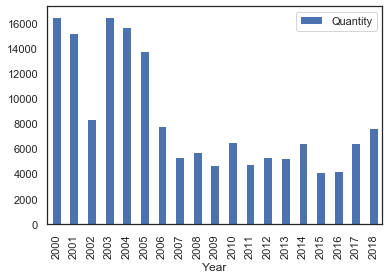

In [265]:
trades_year.plot.bar()
plt.show

In [266]:
# reset index of df
trades_year = df2.groupby('Year').agg({'Quantity': 'sum'}).reset_index()
trades_year.head()

,Year,Quantity
0,2000,16432.0
1,2001,15214.0
2,2002,8333.0
3,2003,16487.0
4,2004,15630.0


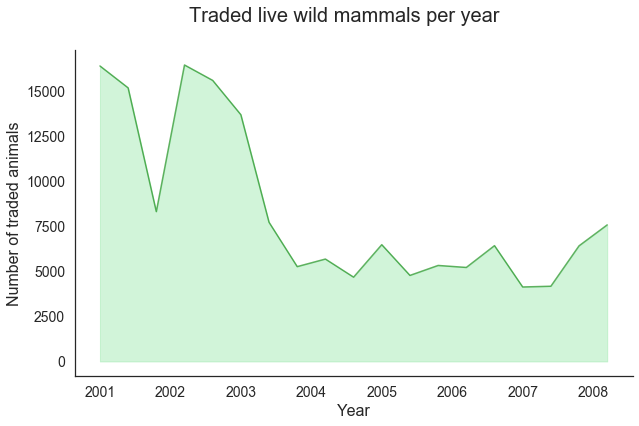

In [267]:
# Plot this in a line area chart

sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes('pastel')

plt.fill_between(trades_year['Year'], trades_year['Quantity'], color="g", alpha=0.4)
plt.plot(trades_year['Year'], trades_year['Quantity'], color="green", alpha=0.6)

ax.set_xticklabels(trades_year['Year'])

ax.tick_params(axis='both', which='major', labelsize=14) 
ax.tick_params(axis='both', which='minor', labelsize=14)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of traded animals', fontsize=16)
plt.suptitle('Traded live wild mammals per year', fontsize=20)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()

plt.show()

In [268]:
# create dataframe with total number of shipped animals per animal group (order)

order_trades = df2.groupby('Animal order').agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False)
order_trades

,Quantity
Animal order,
Primates,124009.0
Carnivores,14826.0
Even-toed Ungulates,9028.0
Whales and Dolphins,2978.0
Odd-toed Ungulates,2255.0
Bats,2197.0
Pangolins,1466.0
Elephants,1455.0
Sloths and Anteaters,278.0


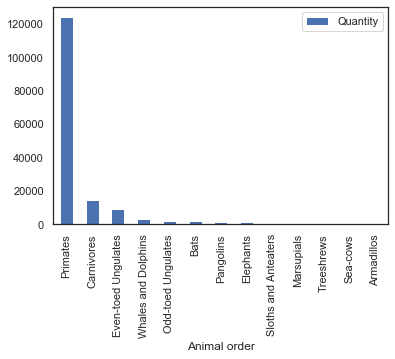

In [269]:
# plot the total number of traded animals

order_trades.plot.bar()

# make this plot nicer

In [270]:
order_trades2 = df2.groupby('Animal order', as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)
order_trades2.head()

,Animal order,Quantity
0,Primates,124009.0
1,Carnivores,14826.0
2,Even-toed Ungulates,9028.0
3,Whales and Dolphins,2978.0
4,Odd-toed Ungulates,2255.0


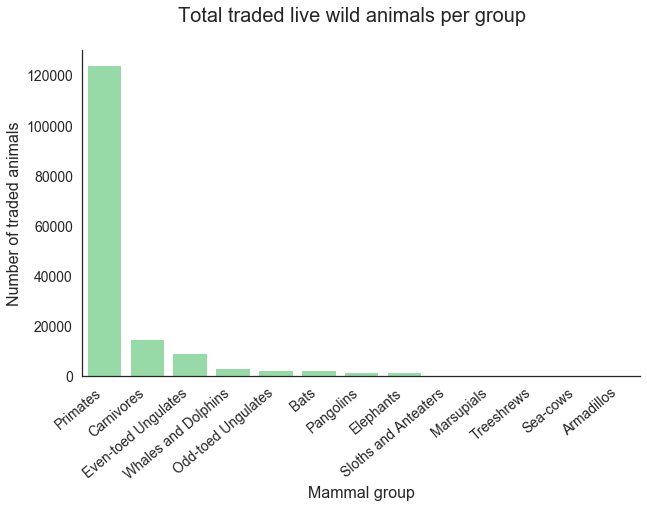

In [298]:
sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(10, 6))

sns.set_color_codes('pastel')
sns.barplot(x='Animal order', y= 'Quantity', data= order_trades2,
            label= 'Mammal group', color="g")

# Add a legend and informative axis label
#ax.legend(loc="upper right", frameon=True)
# ax.set(ylabel= 'Number of traded animals', xlabel= 'Mammal group')
ax.set_xticklabels(order_trades2['Animal order'], rotation=40, ha='right')#, fontsize = 14)

ax.tick_params(axis='both', which='major', labelsize=14) 
ax.tick_params(axis='both', which='minor', labelsize=14)

plt.xlabel('Mammal group', fontsize=16)
plt.ylabel('Number of traded animals', fontsize=16)
plt.suptitle('Total traded live wild animals per group', fontsize=20)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()


In [273]:
# create dataframe with total number of shipped animals per year per animal group (order)

year_order_trades = df2.groupby(['Year', 'Animal order'], as_index = False).agg({'Quantity': 'sum'})
year_order_trades.head()

,Year,Animal order,Quantity
0,2000,Bats,194.0
1,2000,Carnivores,400.0
2,2000,Elephants,121.0
3,2000,Even-toed Ungulates,298.0
4,2000,Odd-toed Ungulates,35.0


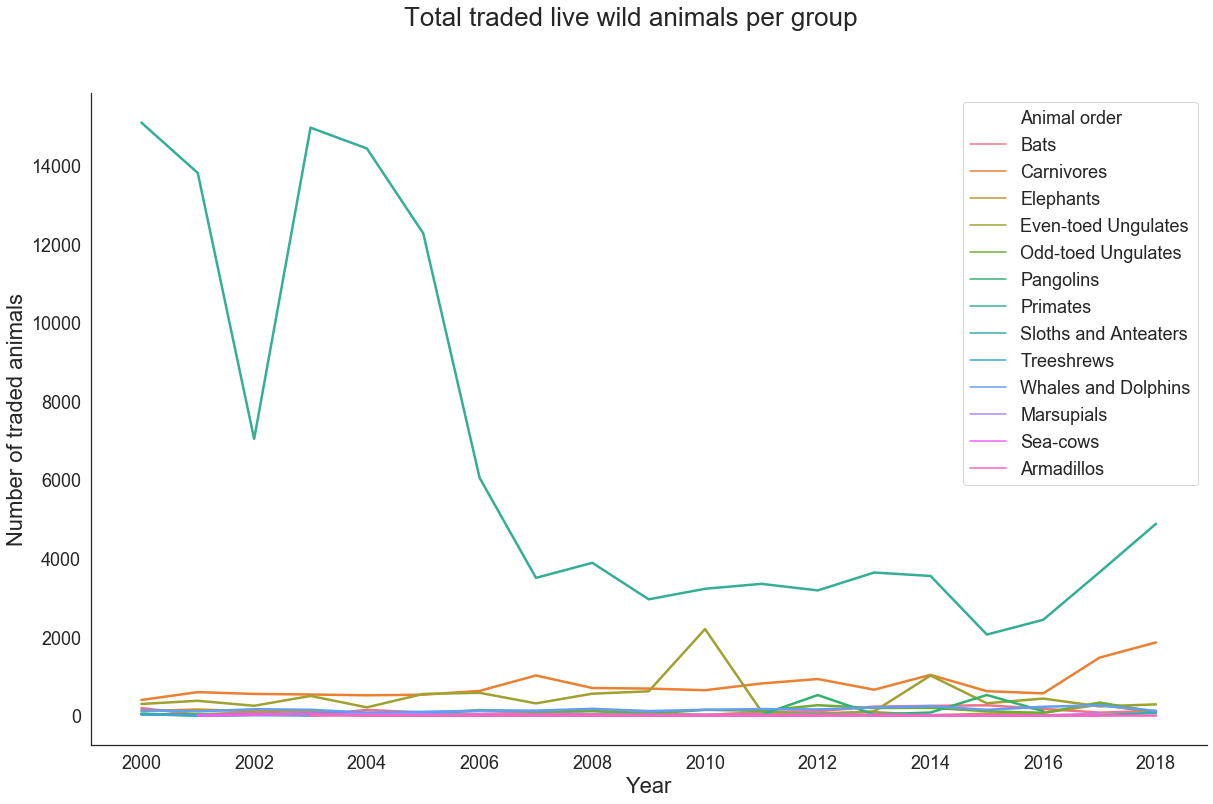

In [274]:
#plot total number of shipped animals per year per animal group (order)

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Animal order', data = year_order_trades, linewidth=2.5)

# ax.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

ax.tick_params(axis='both', which='major', labelsize=18) 
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper right", frameon=True, fontsize = 18)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of traded animals', fontsize=22)
plt.suptitle('Total traded live wild animals per group', fontsize=26)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()


In [275]:
# create dataframe with overall purpose counts and percentages

df_purpose = df2.groupby('Purpose', as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)
df_purpose

,Purpose,Quantity
0,Commercial,85513.0
1,Scientific,21581.0
2,Medical,19223.0
3,Captive breeding,12159.0
4,Zoo,11350.0
5,Reintroduction,2961.0
6,Circus,1518.0
7,Personal,1433.0
8,Educational,410.0
9,Hunting trophy,318.0


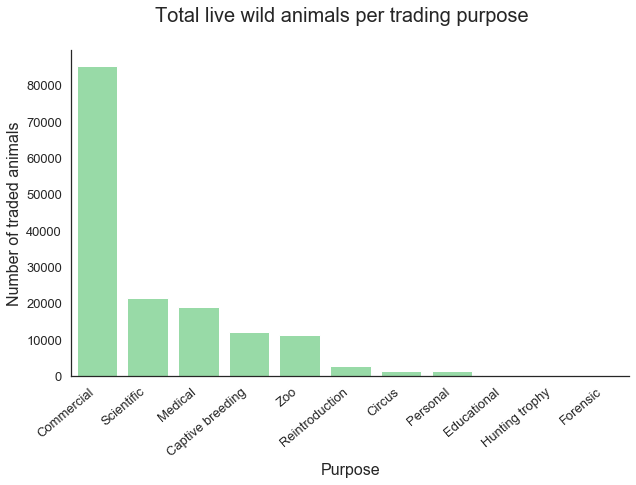

In [276]:
# visualise overall purpose with bar chart

sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(10, 6))

sns.set_color_codes('pastel')
sns.barplot(x='Purpose', y= 'Quantity', data= df_purpose,
            label= 'Purpose', color="g")

# Add a legend and informative axis label
#ax.legend(loc="upper right", frameon=True)

ax.set_xticklabels(df_purpose['Purpose'], rotation=40, ha='right')

ax.tick_params(axis='both', which='major', labelsize=13) 
ax.tick_params(axis='both', which='minor', labelsize=13)

plt.xlabel('Purpose', fontsize=16)
plt.ylabel('Number of traded animals', fontsize=16)
plt.suptitle('Total live wild animals per trading purpose', fontsize=20)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()

In [277]:
# create dataframe with numbers just for primates and years
df_primates = df2[df2['Animal order'] == 'Primates']
year_primates = df_primates.groupby('Year', as_index = False).agg({'Quantity': 'sum'})
year_primates.head()

,Year,Quantity
0,2000,15088.0
1,2001,13807.0
2,2002,7042.0
3,2003,14960.0
4,2004,14431.0


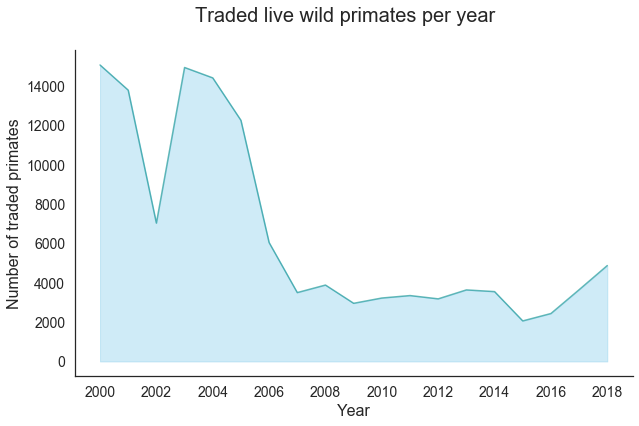

In [299]:
# Create area line chart for primates over time
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes('pastel')

plt.fill_between(year_primates['Year'], year_primates['Quantity'], color="skyblue", alpha=0.4)
plt.plot(year_primates['Year'], year_primates['Quantity'], color="darkcyan", alpha=0.6)

#ax.set_xticklabels(year_primates['Year'])
ax.set_xticks(range(2000, 2020, 2))

ax.tick_params(axis='both', which='major', labelsize=14) 
ax.tick_params(axis='both', which='minor', labelsize=14)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of traded primates', fontsize=16)
plt.suptitle('Traded live wild primates per year', fontsize=20)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()

plt.show()


In [279]:
# look into the different kinds of primates and their trade over time
# make a dataframe and line chart with the different kinds

# First, inspect how many traded primate families there are
primate_family_counts = df_primates.groupby(['Family'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False)

# Add column with percentages of total
primate_family_counts['Percentage'] = (primate_family_counts['Quantity'] / primate_family_counts['Quantity'].sum()) *100
primate_family_counts.head()

# from this it becomes clear that the Old-World Monkeys and the New-World Monkeys are the biggest group, 
# they make up nearly 98% of the traded primates

,Family,Quantity,Percentage
3,Cercopithecidae,93611.0,75.487263
2,Cebidae,27627.0,22.278222
6,Galagidae,856.0,0.690272
0,Aotidae,501.0,0.404003
11,Lorisidae,324.0,0.261271


In [280]:
# let's look at these families in more detail over time, and purpose

primates_top2 = df_primates[df_primates['Family'].isin(['Cercopithecidae', 'Cebidae'])]
year_primates_top2 = primates_top2.groupby(['Year', 'Family'], as_index = False).agg({'Quantity': 'sum'})
year_primates_top2.head()

,Year,Family,Quantity
0,2000,Cebidae,2324.0
1,2000,Cercopithecidae,12501.0
2,2001,Cebidae,1682.0
3,2001,Cercopithecidae,11854.0
4,2002,Cebidae,1968.0


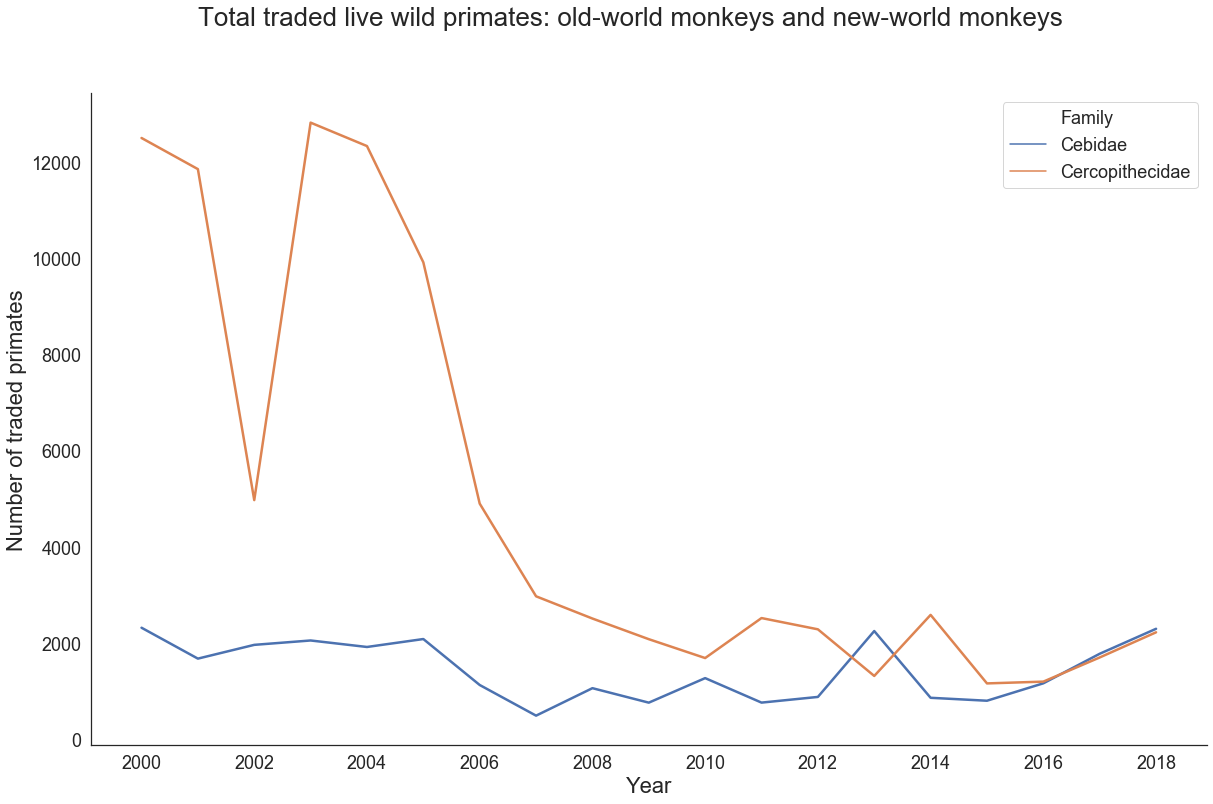

In [281]:
# plot to check distribution

sns.set()
sns.set_style('white')

f, ax = plt.subplots(figsize=(20, 12))
sns.set_color_codes('pastel')

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Family', data = year_primates_top2, linewidth=2.5)

ax.tick_params(axis='both', which='major', labelsize=18) 
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper right", frameon=True, fontsize = 18)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of traded primates', fontsize=22)
plt.suptitle('Total traded live wild primates: old-world monkeys and new-world monkeys', fontsize=26)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()

# change latin names to english ones 
# make two separate plots side to side with filled in colour
# or try to make the filled in plot for both in the same figure

In [284]:
# now look at how the trading purpose changes over time for the primates

# create dataframe with total number of shipped animals per year per purpose

primates_year_purpose = df_primates.groupby(['Year', 'Purpose'], as_index = False).agg({'Quantity': 'sum'})
primates_year_purpose.head(20)

,Year,Purpose,Quantity
0,2000,Captive breeding,8.0
1,2000,Circus,8.0
2,2000,Commercial,6033.0
3,2000,Educational,30.0
4,2000,Hunting trophy,6.0
5,2000,Medical,6040.0
6,2000,Personal,32.0
7,2000,Reintroduction,4.0
8,2000,Scientific,2655.0
9,2000,Zoo,113.0


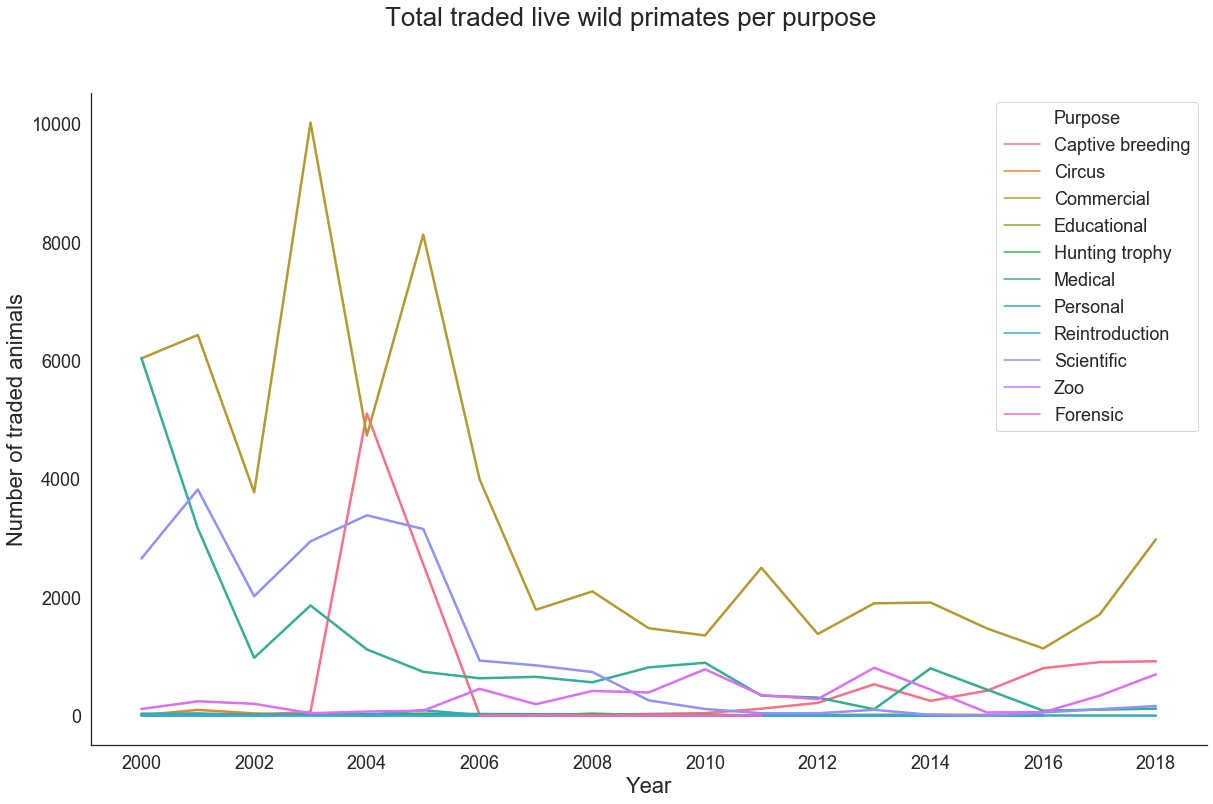

In [283]:
#plot total number of shipped primates per year per purpose

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Purpose', data = primates_year_purpose, linewidth=2.5)

# ax.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

ax.tick_params(axis='both', which='major', labelsize=18) 
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper right", frameon=True, fontsize = 18)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of traded animals', fontsize=22)
plt.suptitle('Total traded live wild primates per purpose', fontsize=26)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()


In [229]:
# same but for carnivores

# create dataframe with numbers just for carnivores and years
df_carnivores = df2[df2['Animal order'] == 'Carnivores']
year_carnivores = df_carnivores.groupby('Year', as_index = False).agg({'Quantity': 'sum'})
year_carnivores.head()

,Year,Quantity
0,2000,400.0
1,2001,599.0
2,2002,554.0
3,2003,539.0
4,2004,519.0


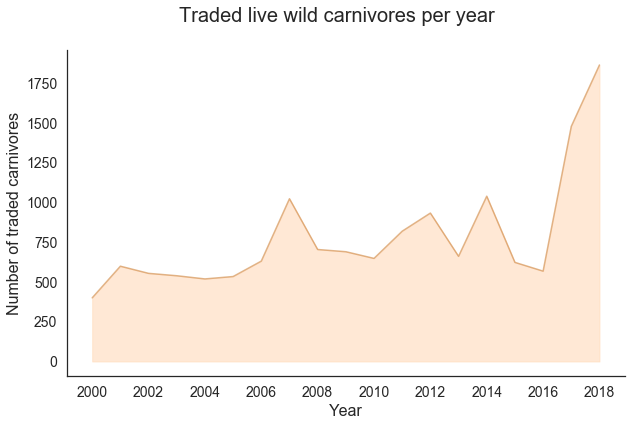

In [231]:
# Create area line chart for carnivores over time
f, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes('pastel')

plt.fill_between(year_carnivores['Year'], year_carnivores['Quantity'], color="peachpuff", alpha=0.6)
plt.plot(year_carnivores['Year'], year_carnivores['Quantity'], color="peru", alpha=0.6)

#ax.set_xticklabels(year_carnivores['Year'])
ax.set_xticks(range(2000, 2020, 2))

ax.tick_params(axis='both', which='major', labelsize=14) 
ax.tick_params(axis='both', which='minor', labelsize=14)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of traded carnivores', fontsize=16)
plt.suptitle('Traded live wild carnivores per year', fontsize=20)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()

plt.show()


In [291]:
# look into the different kinds of carnivores and their trade over time
# make a dataframe and line chart with the different kinds

# First, inspect how many traded carnivore families there are
carnivore_family_counts = df_carnivores.groupby(['Family'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
carnivore_family_counts['Percentage'] = (carnivore_family_counts['Quantity'] / carnivore_family_counts['Quantity'].sum()) *100
carnivore_family_counts

# The are all kind of important. How do their trade patterns look over time?


,Family,Quantity,Percentage
0,Canidae,5251.0,35.417510
1,Otariidae,2896.0,19.533252
2,Felidae,2294.0,15.472818
3,Procyonidae,2193.0,14.791582
4,Viverridae,694.0,4.680966
5,Mustelidae,620.0,4.181843
6,Ursidae,441.0,2.974504
7,Odobenidae,218.0,1.470390
8,Eupleridae,185.0,1.247808
9,Hyaenidae,27.0,0.182113


In [288]:
# let's look at these families in more detail over time, and purpose

year_carnivores_family = df_carnivores.groupby(['Year', 'Family'], as_index = False).agg({'Quantity': 'sum'})
year_carnivores_family.head()

,Year,Family,Quantity
0,2000,Canidae,20.0
1,2000,Eupleridae,30.0
2,2000,Felidae,203.0
3,2000,Mustelidae,23.0
4,2000,Odobenidae,4.0


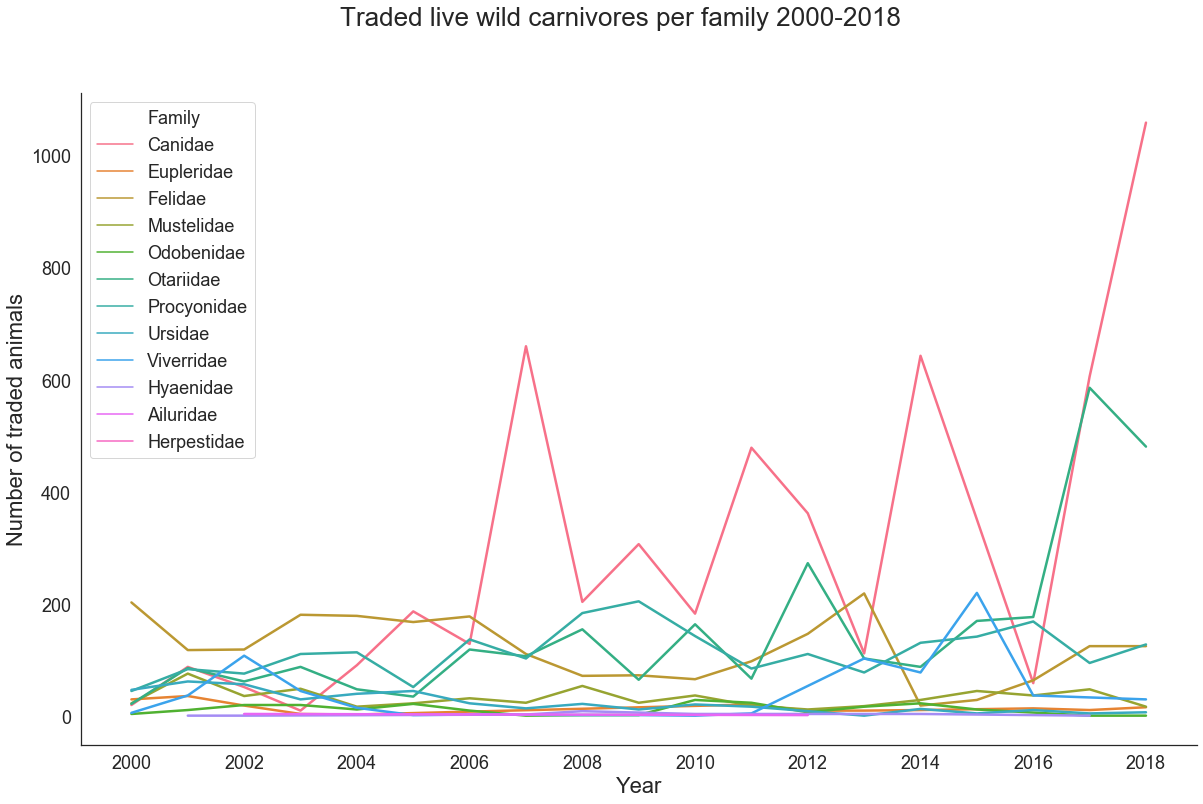

In [294]:
#plot total number of shipped carnivores per year per family

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Family', data = year_carnivores_family, linewidth=2.5)

# ax.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

ax.tick_params(axis='both', which='major', labelsize=18) 
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper left", frameon=True, fontsize = 18)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of traded animals', fontsize=22)
plt.suptitle('Traded live wild carnivores per family 2000-2018', fontsize=26)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()

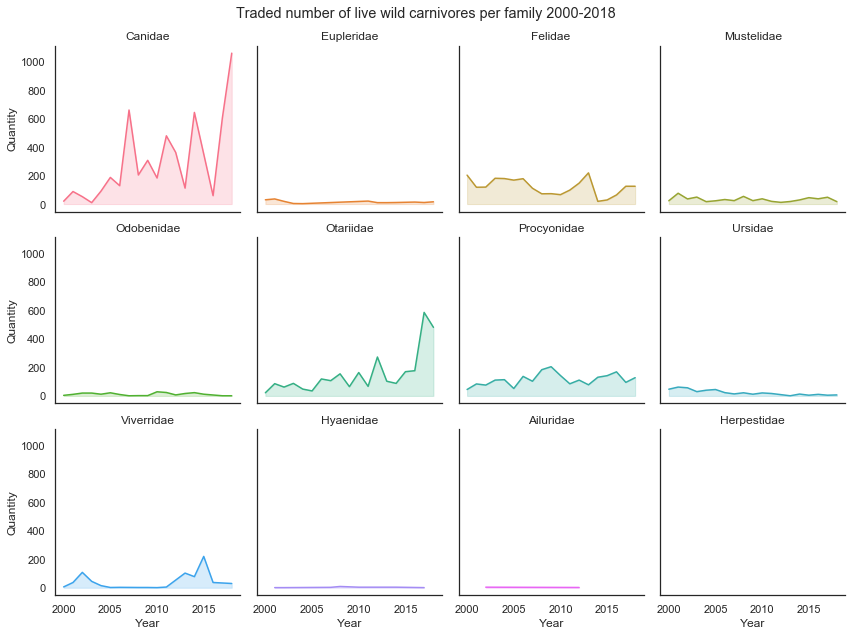

In [295]:
# the same data but in a seaborn facetgrid

g = sns.FacetGrid(year_carnivores_family, col='Family', hue='Family', col_wrap=4, )

g = g.map(plt.plot, 'Year', 'Quantity')

g = g.map(plt.fill_between, 'Year', 'Quantity', alpha=0.2).set_titles("{col_name} Family")

g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Traded number of live wild carnivores per family 2000-2018')
 
plt.show()

# This makes it clear that the Canidae, Felidae, Otariidae and Procyonidae are the most traded groups
# In particular the canidae and the otariidae havce been traded increasingly in recent years

In [305]:
# Let's look into these families in a bit more detail, which genera and species are traded the most?

canidae = df2[df2['Family'] == 'Canidae']

canidae_taxon_counts = canidae.groupby(['Taxon'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
canidae_taxon_counts['Percentage'] = (canidae_taxon_counts['Quantity'] / canidae_taxon_counts['Quantity'].sum()) *100
canidae_taxon_counts

# The fennec fox is by far the most traded canid (87%), followed by the pampas fox and the wolf

,Taxon,Quantity,Percentage
0,Vulpes zerda,4594.0,87.488098
1,Lycalopex gymnocercus,506.0,9.636260
2,Canis lupus,131.0,2.494763
3,Cerdocyon thous,12.0,0.228528
4,Lycalopex griseus,7.0,0.133308
5,Canis aureus,1.0,0.019044


In [306]:
# And how about the Otariidae?

otariidae = df2[df2['Family'] == 'Otariidae']

otariidae_taxon_counts = otariidae.groupby(['Taxon'], as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

# Add column with percentages of total
otariidae_taxon_counts['Percentage'] = (otariidae_taxon_counts['Quantity'] / otariidae_taxon_counts['Quantity'].sum()) *100
otariidae_taxon_counts

# the top two account for more than 99% of the trade and are both species of fur seal

,Taxon,Quantity,Percentage
0,Arctocephalus australis,1722.0,59.461326
1,Arctocephalus pusillus,1161.0,40.089779
2,Arctocephalus spp.,5.0,0.172652
3,Arctocephalus forsteri,4.0,0.138122
4,Arctocephalus tropicalis,4.0,0.138122


In [302]:
# now look at how the trading purpose changes over time for the carnivores

# create dataframe with total number of shipped animals per year per purpose

carnivores_year_purpose = df_carnivores.groupby(['Year', 'Purpose'], as_index = False).agg({'Quantity': 'sum'})
carnivores_year_purpose.head()

,Year,Purpose,Quantity
0,2000,Captive breeding,16.0
1,2000,Circus,38.0
2,2000,Commercial,172.0
3,2000,Hunting trophy,1.0
4,2000,Personal,22.0


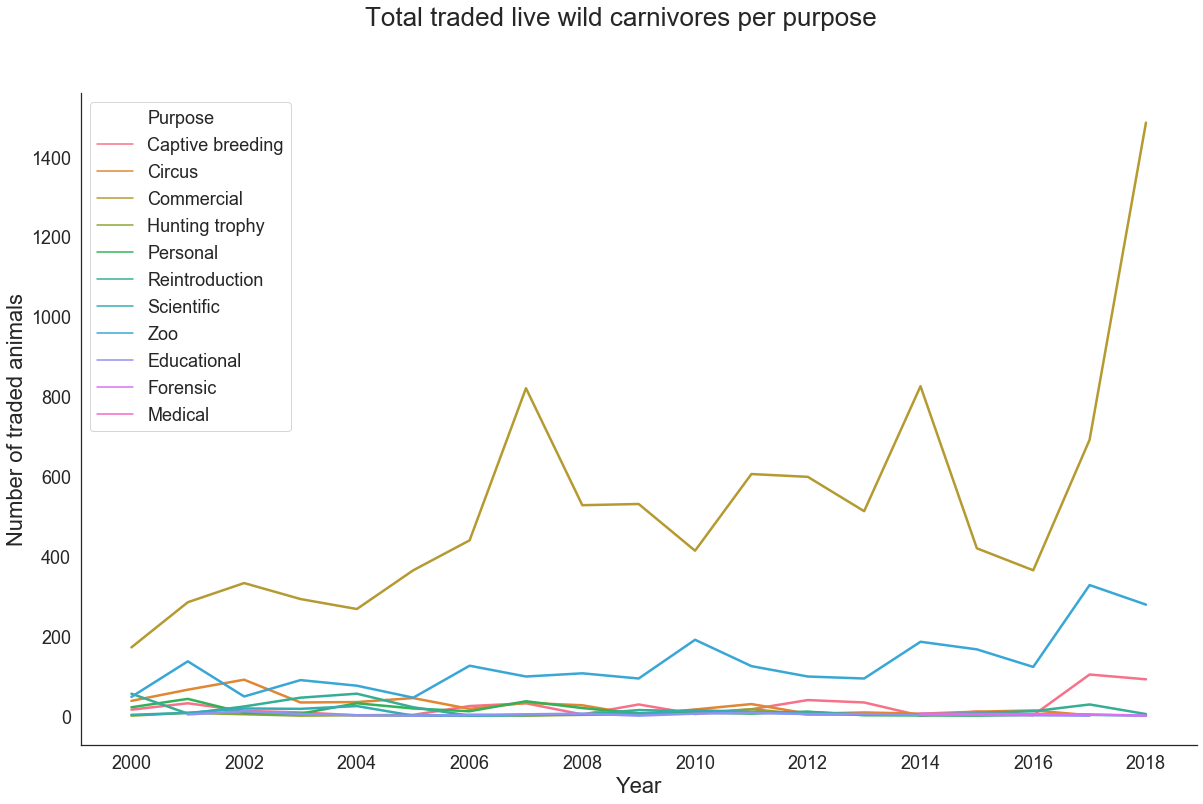

In [304]:
#plot total number of shipped carnivores per year per purpose

f, ax = plt.subplots(figsize=(20, 12))

sns.lineplot(x = 'Year', y = 'Quantity', hue = 'Purpose', data = carnivores_year_purpose, linewidth=2.5)

# ax.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

ax.tick_params(axis='both', which='major', labelsize=18) 
ax.tick_params(axis='both', which='minor', labelsize=18)
ax.set_xticks(range(2000, 2020, 2))

ax.legend(loc="upper left", frameon=True, fontsize = 18)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of traded animals', fontsize=22)
plt.suptitle('Total traded live wild carnivores per purpose', fontsize=26)

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 18)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(rotation=30, ha='right')
sns.despine()


### Using facetgrid in seaborn to compare animal types and trade over time

In [140]:
# create dataframe with total number of shipped animals per year per animal group (order)

order_year_trades = df2.groupby(['Animal order', 'Year'], as_index = False).agg({'Quantity': 'sum'})
order_year_trades.head()

,Animal order,Year,Quantity
0,Armadillos,2003,8.0
1,Armadillos,2018,3.0
2,Bats,2000,194.0
3,Bats,2001,26.0
4,Bats,2002,95.0


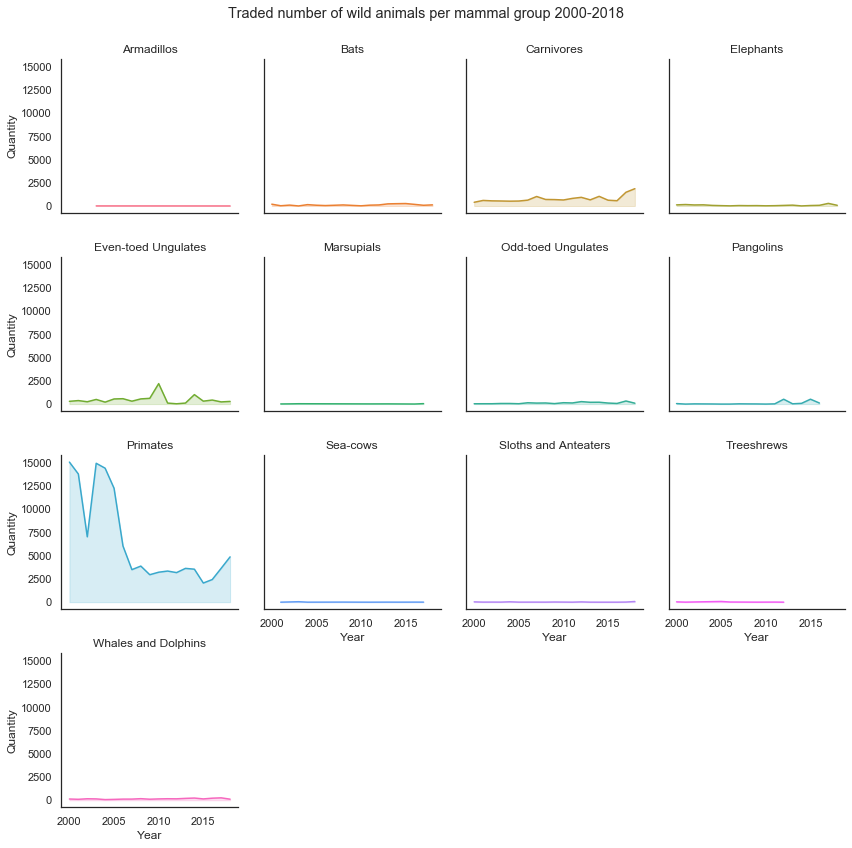

In [141]:
# try visualizing with a facetgrid in seaborn

g = sns.FacetGrid(order_year_trades, col='Animal order', hue='Animal order', col_wrap=4, )

g = g.map(plt.plot, 'Year', 'Quantity')

g = g.map(plt.fill_between, 'Year', 'Quantity', alpha=0.2).set_titles("{col_name} Animal order")

g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Traded number of wild animals per mammal group 2000-2018')
 
plt.show()

# This is nice but not very suitable for the data as the primate trade is so dominant. 
# Would be better if the trade numbers were more in the same range

In [142]:
# do the same one but without the Primates
order_year_trades_noPrimates = order_year_trades[order_year_trades['Animal order'] != 'Primates']
order_year_trades_noPrimates['Animal order'].value_counts()

Whales and Dolphins     19
Even-toed Ungulates     19
Odd-toed Ungulates      19
Elephants               19
Carnivores              19
Bats                    19
Sloths and Anteaters    16
Pangolins               16
Sea-cows                13
Treeshrews               8
Marsupials               7
Armadillos               2
Name: Animal order, dtype: int64

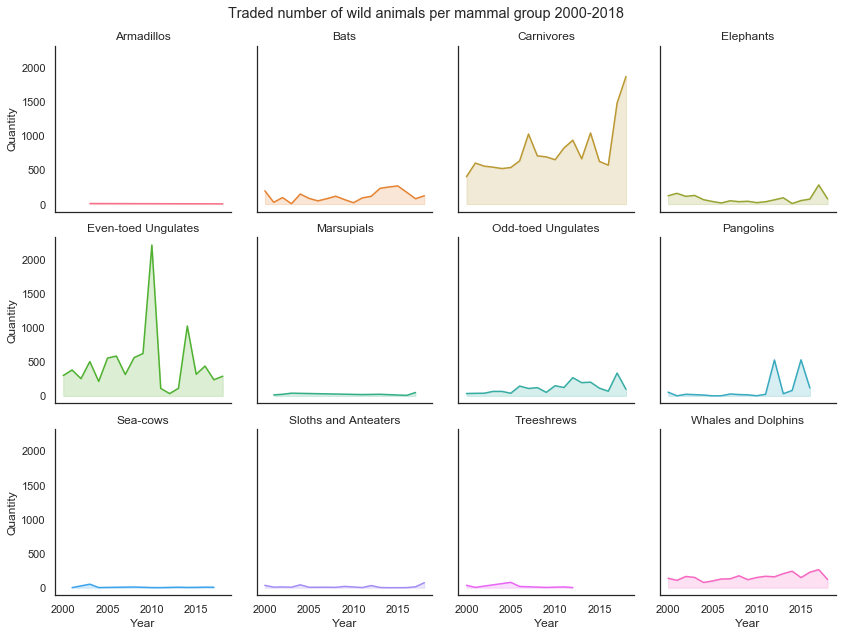

In [143]:
# visualizing the same data without the primates with a facetgrid in seaborn

g = sns.FacetGrid(order_year_trades_noPrimates, col='Animal order', hue='Animal order', col_wrap=4, )

g = g.map(plt.plot, 'Year', 'Quantity')

g = g.map(plt.fill_between, 'Year', 'Quantity', alpha=0.2).set_titles("{col_name} Animal order")

g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Traded number of wild animals per mammal group 2000-2018')
 
plt.show()


In [144]:
# do the same for a selection of the top 8
order_year_trades_selection8 = order_year_trades.loc[order_year_trades['Animal order'].isin(['Bats', 'Odd-toed Ungulates', 'Even-toed Ungulates', 'Elephants', 'Whales and Dolphins', 'Carnivores', 'Sloths and Anteaters', 'Pangolins'])]
order_year_trades_selection8['Animal order'].value_counts()

Whales and Dolphins     19
Even-toed Ungulates     19
Odd-toed Ungulates      19
Elephants               19
Bats                    19
Carnivores              19
Sloths and Anteaters    16
Pangolins               16
Name: Animal order, dtype: int64

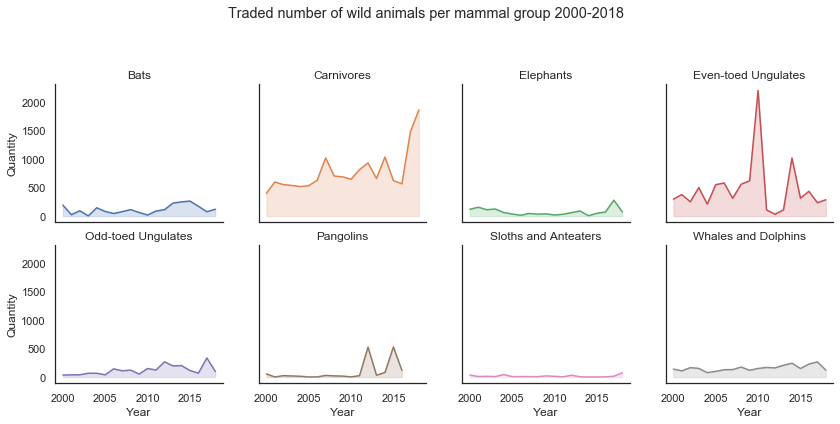

In [145]:
g = sns.FacetGrid(order_year_trades_selection8, col='Animal order', hue='Animal order', col_wrap=4, )

g = g.map(plt.plot, 'Year', 'Quantity')

g = g.map(plt.fill_between, 'Year', 'Quantity', alpha=0.2).set_titles("{col_name} Animal order")

g = g.set_titles("{col_name}")

plt.subplots_adjust(top=0.8)
g = g.fig.suptitle('Traded number of wild animals per mammal group 2000-2018')
 
plt.show()

### Other ideas

In [ ]:
# inspect hunting trophies, how can they be alive?

df2[df2['']]

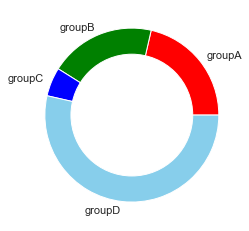

In [154]:
# creating a donut chart

# create data
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
 



In [164]:
# create dataframe with overall purpose counts and percentages

df_purpose = df2.groupby('Purpose2', as_index = False).agg({'Quantity': 'sum'}).sort_values(by = 'Quantity', ascending = False).reset_index(drop = True)

df_purpose['Percentage total'] = (df_purpose['Quantity'] / df_purpose['Quantity'].sum())* 100

df_purpose


,Purpose2,Quantity,Percentage total
0,Commercial,85513.0,54.643339
1,Scientific,21581.0,13.790393
2,Medical,19223.0,12.283617
3,Captive breeding,12159.0,7.769677
4,Zoo,11350.0,7.252721
5,Reintroduction,2961.0,1.892097
6,Circus,1518.0,0.970011
7,Personal,1433.0,0.915696
8,Educational,410.0,0.261993
9,Hunting trophy,318.0,0.203204


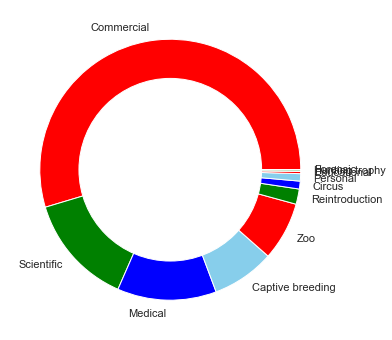

In [166]:
# creating a donut chart

# create data
names= df_purpose['Purpose2']
size= df_purpose['Percentage total']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

f, ax = plt.subplots(figsize=(10, 6))

# Give color names
plt.pie(size, labels=names, colors=['red','green','blue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# use different colours
# group several rows together as 'other'